## Import the required modules

In [891]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score

## Read and understand data

In [701]:
leads_df = pd.read_csv("Leads.csv")

In [702]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [703]:
leads_df.shape

(9240, 37)

There are total 9240 rows and 37 columns in dataset

### Handling NULL/Missing values in the dataset.

Checking columns which has null values

In [704]:
null_cols = round(leads_df.isnull().sum()/len(leads_df.index)*100,2)
null_cols[null_cols > 0]

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     29.32
City                                             15.37
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65
dtype: float64

There are total 17 columns which has null values, out of which there are ~13 columns where the NULL % is > 20.

- We can get rid of records where columns "Lead Source","TotalVisits","Page Views Per Visit","Last Activity" are NULL since they are a very small precentage of total record count.
- We can cap the NULL values at 40%, so we will drop the columns with >40% NULL values.
- For other columns we need to impute them case by case

Let's drop columns with NULL values >40%


In [705]:
for i in null_cols[null_cols > 40].index:
    leads_df.drop(i, 1, inplace = True)

In [706]:
null_cols = round(leads_df.isnull().sum()/len(leads_df.index)*100,2)
null_cols[null_cols > 0]

Lead Source                                       0.39
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Profile                                     29.32
City                                             15.37
dtype: float64

#### Dropping rows where columns "Lead Source","TotalVisits","Page Views Per Visit","Last Activity" are NULL.

In [707]:
leads_df = leads_df.dropna(subset=["Lead Source","TotalVisits","Page Views Per Visit","Last Activity"])

In [708]:
leads_df.shape

(9074, 32)

NULL rows dropped for columns "Lead Source","TotalVisits","Page Views Per Visit","Last Activity"

In [709]:
null_cols = round(leads_df.isnull().sum()/len(leads_df.index)*100,2)
null_cols[null_cols > 0]

Country                                          25.30
Specialization                                   15.77
How did you hear about X Education               24.25
What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Tags                                             36.67
Lead Profile                                     29.78
City                                             15.64
dtype: float64

#### Impute values for remaining columns.

#### Imputing NaN values for "country" column

In [710]:
leads_df["Country"].value_counts(normalize = True)

India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Kuwait                  0.000590
Nigeria                 0.000590
Germany                 0.000590
Canada                  0.000590
Sweden                  0.000443
Italy                   0.000295
Ghana                   0.000295
Belgium                 0.000295
Bangladesh              0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Philippines             0.000295
Netherlands             0.000295
China                   0.000295
Russia                  0.000148
Kenya                   0.000148
Liberia   

As we see for country column ~95% rows have value "India", so we can replace Nan values with value "India"

In [711]:
leads_df['Country'].fillna("India", inplace=True)

#### Impute values for "Specialization" column

In [712]:
leads_df["Specialization"].value_counts(normalize = True)

Select                               0.242182
Finance Management                   0.125474
Human Resource Management            0.109512
Marketing Management                 0.107680
Operations Management                0.065288
Business Administration              0.052205
IT Projects Management               0.047887
Supply Chain Management              0.045270
Banking, Investment And Insurance    0.043831
Travel and Tourism                   0.026429
Media and Advertising                0.026429
International Business               0.023028
Healthcare Management                0.020411
Hospitality Management               0.014523
E-COMMERCE                           0.014523
Retail Management                    0.013084
Rural and Agribusiness               0.009551
E-Business                           0.007458
Services Excellence                  0.005234
Name: Specialization, dtype: float64

As specified in the problem statement there are columns with value "Select" which is equivalent to Nan. Now for this column the probablity of value being Nan is because user haven't specified rather than it being a data issue. So for this column we can use "Not Specified" as a value for Nan and "Select" rows.

In [713]:
leads_df['Specialization'].fillna("Not Specified", inplace=True)
leads_df['Specialization'] = leads_df['Specialization'].replace(to_replace='Select', value='Not Specified')


In [714]:
leads_df["Specialization"].value_counts(normalize = True)

Not Specified                        0.361693
Finance Management                   0.105687
Human Resource Management            0.092242
Marketing Management                 0.090699
Operations Management                0.054992
Business Administration              0.043972
IT Projects Management               0.040335
Supply Chain Management              0.038131
Banking, Investment And Insurance    0.036919
Media and Advertising                0.022261
Travel and Tourism                   0.022261
International Business               0.019396
Healthcare Management                0.017192
E-COMMERCE                           0.012233
Hospitality Management               0.012233
Retail Management                    0.011020
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

Also if we look at the unique values we notice that there are lot of Specialization values which are related to management.
We can group these values and give them a common name, this will reduce number of dummy columns when we prepare data for model building.

In [715]:
leads_df['Specialization'] = leads_df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Managements')  

In [716]:
leads_df["Specialization"].value_counts(normalize = True)

Managements                          0.462530
Not Specified                        0.361693
Business Administration              0.043972
Banking, Investment And Insurance    0.036919
Media and Advertising                0.022261
Travel and Tourism                   0.022261
International Business               0.019396
E-COMMERCE                           0.012233
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

#### Impute column "How did you hear about X Education"

In [717]:
leads_df["How did you hear about X Education"].value_counts(normalize = True)

Select                   0.710794
Online Search            0.117544
Word Of Mouth            0.050480
Student of SomeSchool    0.045097
Other                    0.027058
Multiple Sources         0.022112
Advertisements           0.010183
Social Media             0.009601
Email                    0.003782
SMS                      0.003346
Name: How did you hear about X Education, dtype: float64

In [718]:
#Covert value "Select" wih NaN
leads_df["How did you hear about X Education"] = leads_df["How did you hear about X Education"].replace('Select', np.nan)

In [719]:
# check % NULL values after replacing Select
leads_df["How did you hear about X Education"].isnull().sum()/len(leads_df.index)*100

78.09124972448754

After replacing "Select" with NaN we have 78% rows with NaN values for this column so we'll drop this column.


In [720]:
leads_df.drop("How did you hear about X Education", 1, inplace = True)


In [721]:
null_cols = round(leads_df.isnull().sum()/len(leads_df.index)*100,2)
null_cols[null_cols > 0]

What is your current occupation                  29.57
What matters most to you in choosing a course    29.78
Tags                                             36.67
Lead Profile                                     29.78
City                                             15.64
dtype: float64

#### Imputing column "What is your current occupation"

In [722]:
leads_df["What is your current occupation"].value_counts(normalize = True)

Unemployed              0.856830
Working Professional    0.105930
Student                 0.032233
Other                   0.002347
Housewife               0.001408
Businessman             0.001252
Name: What is your current occupation, dtype: float64

We will replace NaN with "Unemployed"

In [723]:
leads_df['What is your current occupation'].fillna("Unemployed", inplace=True)


#### Imputing column "What matters most to you in choosing a course"

In [724]:
leads_df["What matters most to you in choosing a course"].value_counts(normalize = True)

Better Career Prospects      0.999686
Other                        0.000157
Flexibility & Convenience    0.000157
Name: What matters most to you in choosing a course, dtype: float64

We will replace NaN with "Better Career Prospects"

In [725]:
leads_df['What matters most to you in choosing a course'].fillna("Better Career Prospects", inplace=True)

In [726]:
null_cols = round(leads_df.isnull().sum()/len(leads_df.index)*100,2)
null_cols[null_cols > 0]

Tags            36.67
Lead Profile    29.78
City            15.64
dtype: float64

#### Imputing column "Tags"

In [727]:
leads_df["Tags"].value_counts(normalize = True)

Will revert after reading the email                  0.350792
Ringing                                              0.206543
Interested in other courses                          0.088568
Already a student                                    0.080912
Closed by Horizzon                                   0.052375
switched off                                         0.041761
Busy                                                 0.032191
Lost to EINS                                         0.029929
Not doing further education                          0.025231
Interested  in full time MBA                         0.020184
Graduation in progress                               0.019314
invalid number                                       0.014442
Diploma holder (Not Eligible)                        0.010962
wrong number given                                   0.008178
opp hangup                                           0.005742
number not provided                                  0.004350
in touch

Let's replace the NaN values with "Not Specified"

In [728]:
# Dropping column Tags
leads_df["Tags"].fillna("Not Specified",inplace = True)


In [729]:
null_cols = round(leads_df.isnull().sum()/len(leads_df.index)*100,2)
null_cols[null_cols > 0]

Lead Profile    29.78
City            15.64
dtype: float64

#### Imputing column "Lead Profile"

In [730]:
leads_df["Lead Profile"].value_counts(normalize = True)

Select                         0.636378
Potential Lead                 0.243879
Other Leads                    0.075643
Student of SomeSchool          0.037665
Lateral Student                0.003296
Dual Specialization Student    0.003139
Name: Lead Profile, dtype: float64

This column also has "Select" value which means user haven't selected anything for this attribute and it can be considered as NaN. Let's replace "Select" and NULLS as "Not Specified". 

In [731]:
# Dropping column Lead Profile
leads_df["Lead Profile"].replace("Select",np.nan,inplace = True)
leads_df["Lead Profile"].fillna("Not Specified",inplace = True)


In [732]:
leads_df["Lead Profile"].value_counts(normalize = True)

Not Specified                  0.744655
Potential Lead                 0.171259
Other Leads                    0.053119
Student of SomeSchool          0.026449
Lateral Student                0.002314
Dual Specialization Student    0.002204
Name: Lead Profile, dtype: float64

#### Imputing column "City"

In [733]:
leads_df["City"].value_counts(normalize = True)

Mumbai                         0.415023
Select                         0.281646
Thane & Outskirts              0.097322
Other Cities                   0.088831
Other Cities of Maharashtra    0.058263
Other Metro Cities             0.049249
Tier II Cities                 0.009667
Name: City, dtype: float64

Here we need to first handle value "Select" to treat it as NaN and then we can use Mumbai to replace NULLS since Mumbai is the most occuring value for City column.

In [734]:
leads_df["City"].replace("Select",np.nan,inplace = True)
leads_df["City"].fillna("Mumbai",inplace = True)

In [735]:
leads_df["City"].value_counts(normalize = True)

Mumbai                         0.744104
Thane & Outskirts              0.082103
Other Cities                   0.074939
Other Cities of Maharashtra    0.049151
Other Metro Cities             0.041547
Tier II Cities                 0.008155
Name: City, dtype: float64

#### We have imputed all the NULL values, so we can now start with basic EDA for the new dataset and see if we see any patterns in data.

## EDA for categorical variables

In [647]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,Not Specified,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,Not Specified,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,Not Specified,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,Not Specified,Mumbai,No,No,Modified


In [736]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

#### Lead Origin

In [737]:
leads_df["Lead Origin"].value_counts(normalize = True)

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64

Lets look at conversion rate distribution for this column

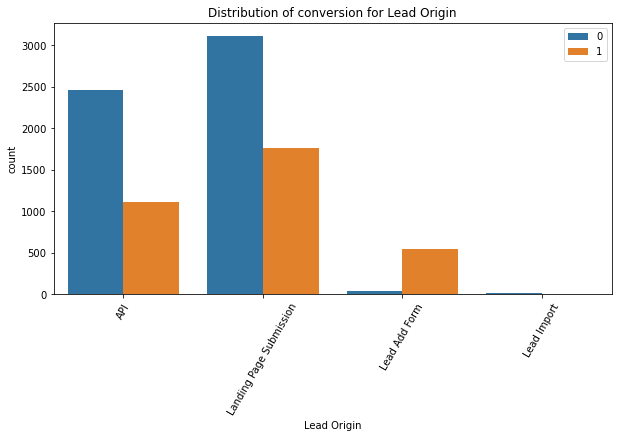

In [738]:
plt.figure(figsize=(10,5))

#Visualing the Countplot
Count_fig=sns.countplot(leads_df["Lead Origin"], hue=leads_df.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=60)

# Formatting the figure
plt.title("Distribution of conversion for Lead Origin")
plt.legend(loc=1)
plt.show()

#### Observation for Lead column:

- "Landing Page Submission" has the highest number of leads followed by "API"
- "Lead Add Form" has higher conversion rate.

#### Lead Source

In [739]:
leads_df["Lead Source"].value_counts(normalize = True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Social Media          0.022041
Live Chat             0.022041
Press_Release         0.022041
youtubechannel        0.011020
Pay per Click Ads     0.011020
welearnblog_Home      0.011020
blog                  0.011020
WeLearn               0.011020
NC_EDM                0.011020
testone               0.011020
Name: Lead Source, dtype: float64

Looking at the values we need some corrections and group few values under one group.

- Need to replace "google" with "Google"
- Club all the values contributing less than 1% into category as "Others"

In [740]:
# Perfroming above operations
leads_df["Lead Source"] = leads_df["Lead Source"].replace("google","Google")
leads_df["Lead Source"] = leads_df["Lead Source"].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM','Facebook','Live Chat','Social Media'],"Others")

In [741]:
leads_df["Lead Source"].value_counts(normalize = True)*100

Google              31.661891
Direct Traffic      28.025127
Olark Chat          19.318933
Organic Search      12.717655
Reference            4.882081
Welingak Website     1.421644
Referral Sites       1.377562
Others               0.595107
Name: Lead Source, dtype: float64

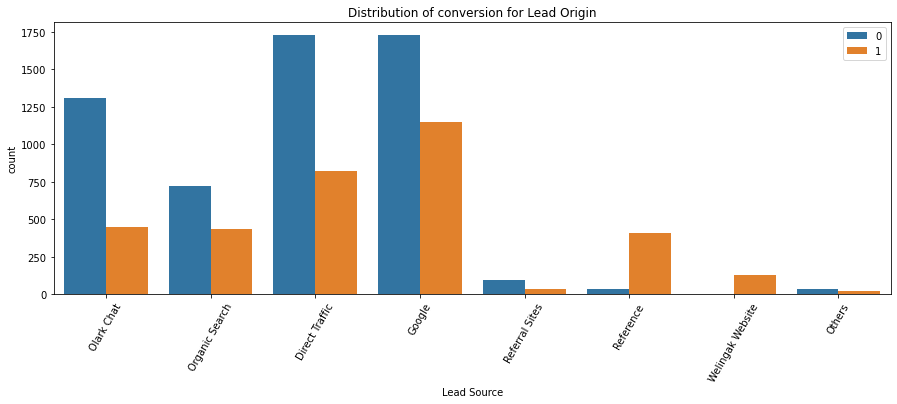

In [742]:
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig=sns.countplot(leads_df["Lead Source"], hue=leads_df.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=60)

# Formatting the figure
plt.title("Distribution of conversion for Lead Origin")
plt.legend(loc=1)
plt.show()

Observations for Lead Source column

- Most of te leads are sourced from Google and Direct Traffic follwed by Olark Chat
- Percentage wise leads from reference have highest conversion rate.

####  Last Activity

In [743]:
leads_df["Last Activity"].value_counts(normalize = True)

Email Opened                    0.378223
SMS Sent                        0.299317
Olark Chat Conversation         0.107119
Page Visited on Website         0.070531
Converted to Lead               0.047168
Email Bounced                   0.034384
Email Link Clicked              0.029425
Form Submitted on Website       0.012784
Unreachable                     0.009918
Unsubscribed                    0.006502
Had a Phone Conversation        0.002755
View in browser link Clicked    0.000661
Approached upfront              0.000551
Email Received                  0.000220
Email Marked Spam               0.000220
Visited Booth in Tradeshow      0.000110
Resubscribed to emails          0.000110
Name: Last Activity, dtype: float64

We can see there are lot of activities which individually are <1% of the total data set, we can club them into one category as "Other" to reduce the number of dummy variables which we'll create eventually for model building.

In [744]:
leads_df["Last Activity"] = leads_df["Last Activity"].replace(["Unreachable","Unsubscribed","Had a Phone Conversation","View in browser link Clicked","Approached upfront","Email Received","Email Marked Spam","Visited Booth in Tradeshow","Resubscribed to emails"],"Others")

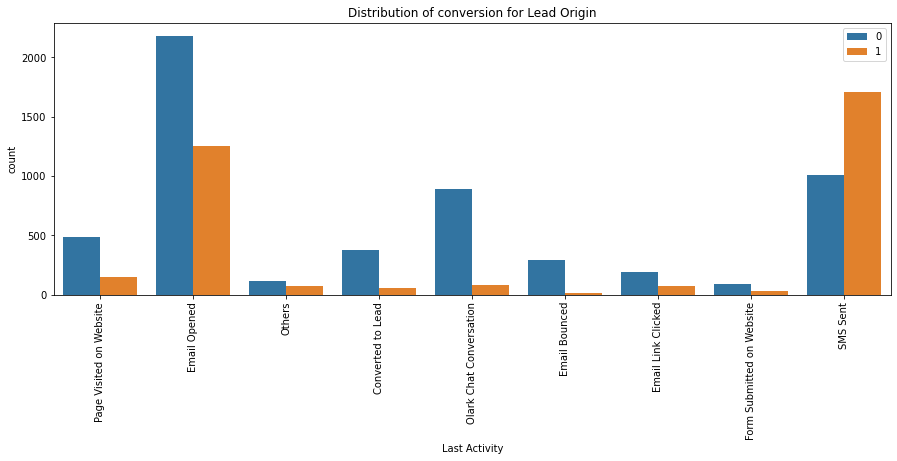

In [745]:
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig=sns.countplot(leads_df["Last Activity"], hue=leads_df.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of conversion for Lead Origin")
plt.legend(loc=1)
plt.show()

#### Observations for Last Activity:

- Categories "Email Opened" and "SMS Sent" have the highest number of leads.
- Category "SMS Sent" has the highest conversion rate.

#### Country

In [746]:
leads_df["Country"].value_counts(normalize = True)

India                   0.968371
United States           0.007604
United Arab Emirates    0.005841
Singapore               0.002645
Saudi Arabia            0.002314
United Kingdom          0.001653
Australia               0.001433
Qatar                   0.001102
Bahrain                 0.000771
Hong Kong               0.000771
Oman                    0.000661
France                  0.000661
unknown                 0.000551
South Africa            0.000441
Kuwait                  0.000441
Nigeria                 0.000441
Germany                 0.000441
Canada                  0.000441
Sweden                  0.000331
Italy                   0.000220
Ghana                   0.000220
Belgium                 0.000220
Bangladesh              0.000220
Asia/Pacific Region     0.000220
Uganda                  0.000220
Philippines             0.000220
Netherlands             0.000220
China                   0.000220
Russia                  0.000110
Kenya                   0.000110
Liberia   

As we see India contributes to ~96% of total leads, this could lead to a bias and we shouldn't use this column in our model building. Dropping the column Country from dataframe.

In [747]:
#drop country column
leads_df.drop("Country", 1, inplace = True)

#### Specialization

In [748]:
leads_df["Specialization"].value_counts(normalize = True)

Managements                          0.462530
Not Specified                        0.361693
Business Administration              0.043972
Banking, Investment And Insurance    0.036919
Media and Advertising                0.022261
Travel and Tourism                   0.022261
International Business               0.019396
E-COMMERCE                           0.012233
Rural and Agribusiness               0.008045
E-Business                           0.006282
Services Excellence                  0.004408
Name: Specialization, dtype: float64

Lets look at conversion rate

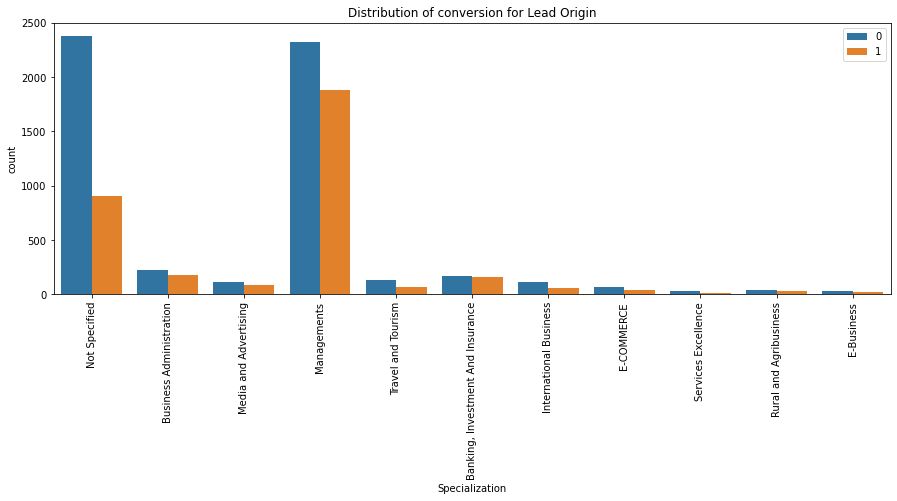

In [749]:
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig=sns.countplot(leads_df["Specialization"], hue=leads_df.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Distribution of conversion for Lead Origin")
plt.legend(loc=1)
plt.show()

#### Observations for Specialization column:
- Most leads are from management background followed by people who have not specified their Specialization
- Conversion rate amongst management specialization is also the highest.

#### What is your current occupation

In [750]:
leads_df["What is your current occupation"].value_counts(normalize = True)

Unemployed              0.899162
Working Professional    0.074609
Student                 0.022702
Other                   0.001653
Housewife               0.000992
Businessman             0.000882
Name: What is your current occupation, dtype: float64

Almost ~90% o the leads have selected "Unemployed" as occupation. 
Let's look at the conversion rate for this column.

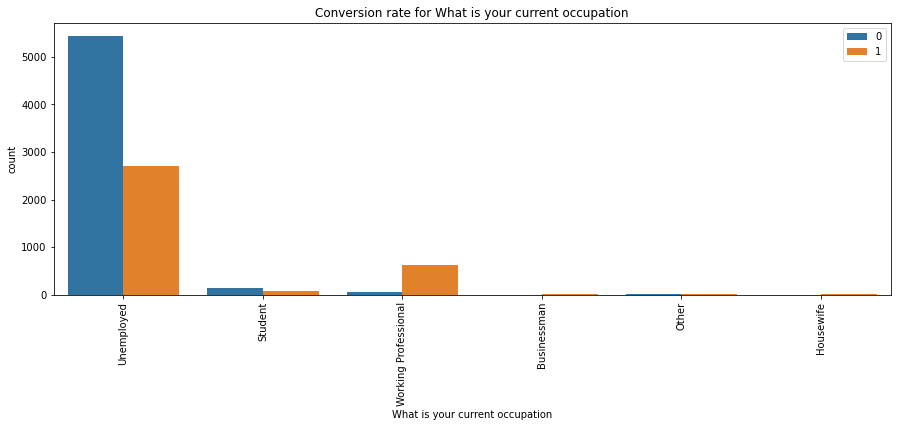

In [751]:
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig=sns.countplot(leads_df["What is your current occupation"], hue=leads_df.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Conversion rate for What is your current occupation")
plt.legend(loc=1)
plt.show()

Observations for "What is your current occupation"
- "Unemployed" is the most occurring occupation.
- Conversion rate for "Working Professional" is highest amongst all categories.


-------------------------------------------------------
#### Tags

In [752]:
leads_df["Tags"].value_counts(normalize = True)

Not Specified                                        0.366652
Will revert after reading the email                  0.222173
Ringing                                              0.130813
Interested in other courses                          0.056094
Already a student                                    0.051245
Closed by Horizzon                                   0.033172
switched off                                         0.026449
Busy                                                 0.020388
Lost to EINS                                         0.018955
Not doing further education                          0.015980
Interested  in full time MBA                         0.012784
Graduation in progress                               0.012233
invalid number                                       0.009147
Diploma holder (Not Eligible)                        0.006943
wrong number given                                   0.005180
opp hangup                                           0.003637
number n

We can club tags with very few occurances into one tag "Others"

In [753]:
leads_df['Tags'] = leads_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','switched off','Already a student','Not doing further education',
                                     'invalid number','wrong number given','Interested  in full time MBA'], 'Others')


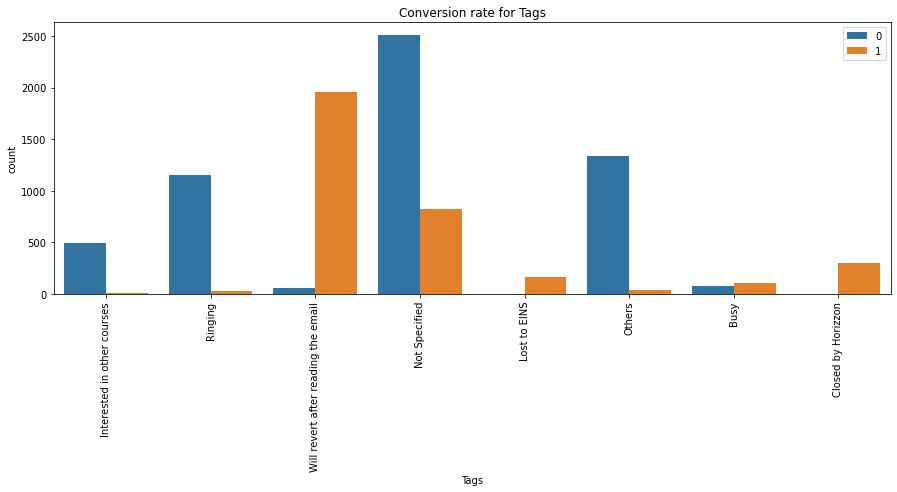

In [754]:
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig=sns.countplot(leads_df["Tags"], hue=leads_df.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Conversion rate for Tags")
plt.legend(loc=1)
plt.show()

Observations for Tags:
- "Not Specified" contributes most for this column
- Conversion rate for tag "Will revert after reading the email" is highest.
-------------------------------------------------------------------------------------------------------

#### Last Notable Activity

In [755]:
leads_df["Last Notable Activity"].value_counts(normalize = True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
Form Submitted on Website       0.000110
Resubscribed to emails          0.000110
View in browser link Clicked    0.000110
Email Received                  0.000110
Approached upfront              0.000110
Name: Last Notable Activity, dtype: float64

Clubbing all the Notable activities which occur less than 1% into "Others"

In [756]:
leads_df['Last Notable Activity'] = leads_df['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam',
                                                                       'Unreachable','Unsubscribed','Email Bounced',
                                                                       'Resubscribed to emails','View in browser link Clicked',
                                                                       'Approached upfront', 'Form Submitted on Website',
                                                                       'Email Received'],'Others')

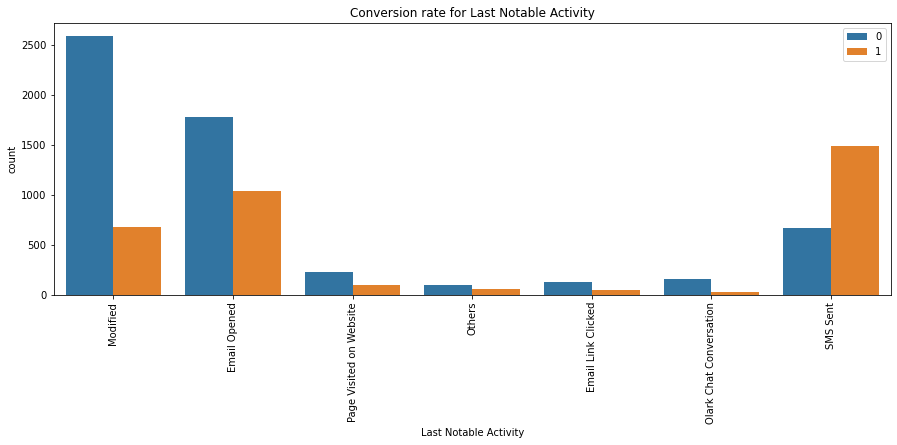

In [757]:
plt.figure(figsize=(15,5))

#Visualing the Countplot
Count_fig=sns.countplot(leads_df["Last Notable Activity"], hue=leads_df.Converted)
Count_fig.set_xticklabels(Count_fig.get_xticklabels(),rotation=90)

# Formatting the figure
plt.title("Conversion rate for Last Notable Activity")
plt.legend(loc=1)
plt.show()

Observation for Last Notable Activity
- "Modified" and "Email Opened" are most occurring.
- "SMS Sent" has highest conversion rate

#### What matters most to you in choosing a course

In [758]:
leads_df["What matters most to you in choosing a course"].value_counts(normalize = True)

Better Career Prospects      0.99978
Other                        0.00011
Flexibility & Convenience    0.00011
Name: What matters most to you in choosing a course, dtype: float64

Almost everyone has selected "Better Career Prospects" for using the platform. This column won't add any value to our model.
Dropping the column

In [759]:
leads_df.drop("What matters most to you in choosing a course", 1, inplace = True)

#### Checking the remaining columns which has Yes/No answers.

In [760]:
leads_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Search',
       'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [761]:
Check_cat_var = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call'])

for i in Check_cat_var:
    print(i)
    print(leads_df[i].value_counts(dropna=False))
    print("================================================================")

Search
No     9060
Yes      14
Name: Search, dtype: int64
Magazine
No    9074
Name: Magazine, dtype: int64
Newspaper Article
No     9072
Yes       2
Name: Newspaper Article, dtype: int64
X Education Forums
No     9073
Yes       1
Name: X Education Forums, dtype: int64
Newspaper
No     9073
Yes       1
Name: Newspaper, dtype: int64
Digital Advertisement
No     9070
Yes       4
Name: Digital Advertisement, dtype: int64
Through Recommendations
No     9067
Yes       7
Name: Through Recommendations, dtype: int64
Receive More Updates About Our Courses
No    9074
Name: Receive More Updates About Our Courses, dtype: int64
Update me on Supply Chain Content
No    9074
Name: Update me on Supply Chain Content, dtype: int64
Get updates on DM Content
No    9074
Name: Get updates on DM Content, dtype: int64
I agree to pay the amount through cheque
No    9074
Name: I agree to pay the amount through cheque, dtype: int64
Do Not Email
No     8358
Yes     716
Name: Do Not Email, dtype: int64
Do Not Call
N

Column 'Do Not Email' still has some "No" Flags so removing that column from the list of columns to be dropped.
From the above result we know that "No" is the most occurring answer. Also most of these parameters are not giving any important insight into the leead. We can drop these columns.

In [762]:
# Dropping irrelevant columns
cols_to_drop = (['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque','Do Not Call'])

for i in cols_to_drop:
    leads_df.drop(i,1,inplace = True)

In [763]:
leads_df["A free copy of Mastering The Interview"].value_counts(normalize = True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [764]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   obje

## EDA for numeric variables

#### Converted

In [765]:
leads_df['Converted'].value_counts(normalize=True)*100

0    62.144589
1    37.855411
Name: Converted, dtype: float64

Overall conversion rate is ~38%

#### TotalVisits

In [766]:
leads_df['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [767]:
leads_df['TotalVisits'].quantile(0.99)

17.0

As we can see the median is 3,  0.75 Quantile value is 5 and the max value is 251. 
SO clearly there are outliers in the data for TotalVisits.
Let's confirm this by plotting Box-Plot


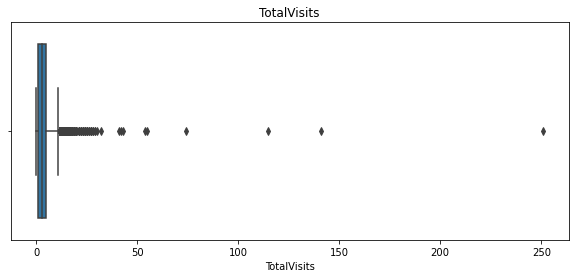

In [768]:
plt.figure(figsize=(10,4))

sns.boxplot(x=leads_df['TotalVisits'])

## Formatting the figure
plt.title('TotalVisits')
plt.show()

We can either remove the outliers or cap the values at 99th percentile. Let's not remove any rows rather cap the outlier values to 99th percentile value.

In [769]:
cap = leads_df['TotalVisits'].quantile(0.99)
leads_df['TotalVisits'] = np.clip(leads_df['TotalVisits'], a_max=cap, a_min=None)


Lets look at TotalVisits column after treating outliers.

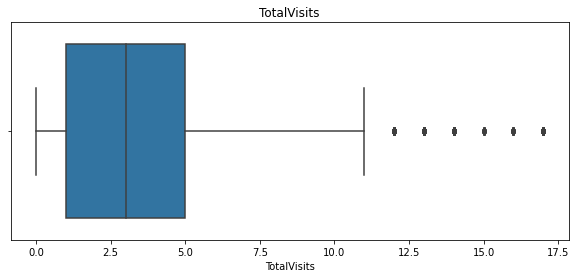

In [770]:
plt.figure(figsize=(10,4))

sns.boxplot(x=leads_df['TotalVisits'])

## Formatting the figure
plt.title('TotalVisits')
plt.show()

#### Total Time Spent on Website

In [771]:
leads_df["Total Time Spent on Website"].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [772]:
leads_df["Total Time Spent on Website"].quantile(0.90)

1373.0

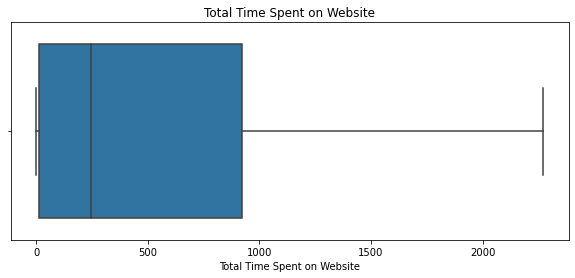

In [773]:
plt.figure(figsize=(10,4))

sns.boxplot(x=leads_df['Total Time Spent on Website'])

plt.title('Total Time Spent on Website')
plt.show()

The box plot suggests that there are no outliers for column "Total Time Spent on Website"

## Data Preparation for Model Building

In [774]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9074 non-null   object 
 1   Lead Number                             9074 non-null   int64  
 2   Lead Origin                             9074 non-null   object 
 3   Lead Source                             9074 non-null   object 
 4   Do Not Email                            9074 non-null   object 
 5   Converted                               9074 non-null   int64  
 6   TotalVisits                             9074 non-null   float64
 7   Total Time Spent on Website             9074 non-null   int64  
 8   Page Views Per Visit                    9074 non-null   float64
 9   Last Activity                           9074 non-null   object 
 10  Specialization                          9074 non-null   obje

In [678]:
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,Interested in other courses,Not Specified,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,Ringing,Not Specified,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,Ringing,Not Specified,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,Will revert after reading the email,Not Specified,Mumbai,No,Modified


We have one column "A free copy of Mastering The Interview" with binary value(Yes/No), lets convert it to numeric binary 0/1.

In [775]:
# Binary mapping
binary_map = lambda x: 1 if x == "Yes" else 0

leads_df["A free copy of Mastering The Interview"] = leads_df["A free copy of Mastering The Interview"].apply(binary_map)
leads_df["Do Not Email"] = leads_df["Do Not Email"].apply(binary_map)


#### Creating dummy variables for categorical columns
---------------------------------------------------------------------------------

We have lot of categorical columns for which we need dummy variables.

In [776]:
d1 = pd.get_dummies(leads_df["Lead Origin"], prefix = "Origin",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("Lead Origin",1,inplace = True)

In [681]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Prospect ID                      9074 non-null   object 
 1   Lead Number                      9074 non-null   int64  
 2   Lead Source                      9074 non-null   object 
 3   Converted                        9074 non-null   int64  
 4   TotalVisits                      9074 non-null   float64
 5   Total Time Spent on Website      9074 non-null   int64  
 6   Page Views Per Visit             9074 non-null   float64
 7   Last Activity                    9074 non-null   object 
 8   Specialization                   9074 non-null   object 
 9   What is your current occupation  9074 non-null   object 
 10  Tags                             9074 non-null   object 
 11  Lead Profile                     9074 non-null   object 
 12  City                

In [777]:
# Lead Source
d1 = pd.get_dummies(leads_df["Lead Source"], prefix = "Source",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("Lead Source",1,inplace = True)

# Last Activity
d1 = pd.get_dummies(leads_df["Last Activity"], prefix = "last_activity",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("Last Activity",1,inplace = True)

# Specialization
d1 = pd.get_dummies(leads_df["Specialization"], prefix = "Specialization",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("Specialization",1,inplace = True)

# What is your current occupation
d1 = pd.get_dummies(leads_df["What is your current occupation"], prefix = "occupation",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("What is your current occupation",1,inplace = True)

# Tags
d1 = pd.get_dummies(leads_df["Tags"], prefix = "Tag",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("Tags",1,inplace = True)

# Lead Profile
d1 = pd.get_dummies(leads_df["Lead Profile"], prefix = "Profile",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("Lead Profile",1,inplace = True)

# City
d1 = pd.get_dummies(leads_df["City"], prefix = "City",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("City",1,inplace = True)


# City
d1 = pd.get_dummies(leads_df["Last Notable Activity"], prefix = "Last Notable Activity",drop_first = True)
leads_df = pd.concat([leads_df,d1],axis = 1)
leads_df.drop("Last Notable Activity",1,inplace = True)

In [778]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Do Not Email                                   9074 non-null   int64  
 3   Converted                                      9074 non-null   int64  
 4   TotalVisits                                    9074 non-null   float64
 5   Total Time Spent on Website                    9074 non-null   int64  
 6   Page Views Per Visit                           9074 non-null   float64
 7   A free copy of Mastering The Interview         9074 non-null   int64  
 8   Origin_Landing Page Submission                 9074 non-null   uint8  
 9   Origin_Lead Add Form                           9074 

#### Creating Training and Test datasets

In [779]:
# create X and Y datasets

x = leads_df.drop(["Prospect ID","Lead Number","Converted"], axis=1) # independant variables
y = leads_df['Converted'] # Target Variable

In [780]:
# test, train split 70:30

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [686]:
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

In [781]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Google,Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,2.0,397,2.0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,2.0,190,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4750,0,2.0,1380,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0,5.0,1584,2.5,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


#### Scalling data for numeric variables.

In [782]:
scaler = StandardScaler()
X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Google,Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3009,0,-0.417238,-0.160255,-0.179666,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1012,1,-0.417238,-0.540048,-0.179666,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9226,0,-1.034493,-0.888650,-1.132538,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4750,0,-0.417238,1.643304,-0.179666,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7987,0,0.508645,2.017593,0.058552,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [783]:
# Check if there is imbalance for conversion rate
sum(leads_df["Converted"])/len(leads_df["Converted"].index)

0.3785541106458012

Conversion Rate is 37% which indicates there is not a lot of imbalance which we need to handle.

In [784]:
# checking correlations between variables
leads_df.corr()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,1.000000,-0.098898,0.022830,0.039849,0.018360,0.058703,-0.106875,-0.069574,0.024933,0.075668,...,-0.006918,-0.025517,0.025293,-0.039212,0.082276,0.073397,-0.031037,0.003497,0.003162,-0.169679
Do Not Email,-0.098898,1.000000,-0.140786,0.011474,-0.046192,0.036403,0.058023,0.099661,-0.031468,-0.016857,...,-0.004146,0.039438,-0.005637,0.046183,-0.189628,0.122812,-0.012911,0.298559,0.050922,-0.029608
Converted,0.022830,-0.140786,1.000000,0.048849,0.359261,0.000260,-0.030860,-0.037481,0.300775,-0.009328,...,0.028551,0.012849,0.041365,-0.007612,-0.013084,-0.263532,-0.071564,0.002064,-0.033830,0.360233
TotalVisits,0.039849,0.011474,0.048849,1.000000,0.328090,0.692218,0.279351,0.408633,-0.245896,-0.054484,...,0.054384,0.068032,0.094597,0.019821,0.065894,-0.145228,-0.053227,0.013932,0.228477,0.010316
Total Time Spent on Website,0.018360,-0.046192,0.359261,0.328090,1.000000,0.318350,0.177435,0.292571,-0.188526,-0.050742,...,0.069355,0.050121,0.076813,0.021938,0.016546,-0.127020,-0.050877,0.013912,0.028713,0.137169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Last Notable Activity_Modified,0.073397,0.122812,-0.263532,-0.145228,-0.127020,-0.096466,-0.073831,-0.084643,-0.068634,-0.007204,...,-0.037784,-0.050318,-0.021100,0.008570,-0.504057,1.000000,-0.107609,-0.099849,-0.142942,-0.418219
Last Notable Activity_Olark Chat Conversation,-0.031037,-0.012911,-0.071564,-0.053227,-0.050877,-0.088593,-0.059317,-0.118758,-0.024714,-0.008263,...,-0.025366,-0.014155,-0.031484,-0.013009,-0.096412,-0.107609,1.000000,-0.019098,-0.027341,-0.079994
Last Notable Activity_Others,0.003497,0.298559,0.002064,0.013932,0.013912,0.017198,0.006716,0.016800,-0.017610,-0.007667,...,-0.006882,0.014505,-0.002984,-0.012071,-0.089459,-0.099849,-0.019098,1.000000,-0.025369,-0.074225
Last Notable Activity_Page Visited on Website,0.003162,0.050922,-0.033830,0.228477,0.028713,0.026102,0.035753,0.043041,-0.015572,-0.010976,...,-0.012835,-0.012649,0.017227,0.009373,-0.128068,-0.142942,-0.027341,-0.025369,1.000000,-0.106259


As we see from the correlation matrix, there are no variables with very high correlation between them. 

-----------------------------------------------------------------------------------------------------------------------

## Model Building
-----------------------------------------------------------------------------------------------------------------------


In [804]:
# All the columns after adding dummy variables.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 3009 to 5754
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Do Not Email                                   6351 non-null   int64  
 1   TotalVisits                                    6351 non-null   float64
 2   Total Time Spent on Website                    6351 non-null   float64
 3   Page Views Per Visit                           6351 non-null   float64
 4   A free copy of Mastering The Interview         6351 non-null   int64  
 5   Origin_Landing Page Submission                 6351 non-null   uint8  
 6   Origin_Lead Add Form                           6351 non-null   uint8  
 7   Origin_Lead Import                             6351 non-null   uint8  
 8   Source_Google                                  6351 non-null   uint8  
 9   Source_Olark Chat                              63

Let's make use of RFE(Recursive Feature Elimination) to select top 15 features and then we'll try to build model using those features.

In [816]:
#Creating an instance of Logistic Regression
logreg = LogisticRegression()

 # running RFE with 20 variables 
rfe = RFE(logreg, 20)    
rfe = rfe.fit(X_train, y_train)
rfe.support_

array([ True, False,  True, False, False,  True,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True, False, False,  True, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False, False, False,
       False,  True, False, False,  True, False,  True])

In [814]:
# Combining the data to understand the full RFE data
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 29),
 ('Origin_Landing Page Submission', False, 2),
 ('Origin_Lead Add Form', True, 1),
 ('Origin_Lead Import', False, 10),
 ('Source_Google', False, 46),
 ('Source_Olark Chat', False, 4),
 ('Source_Organic Search', False, 21),
 ('Source_Others', False, 26),
 ('Source_Reference', False, 19),
 ('Source_Referral Sites', False, 25),
 ('Source_Welingak Website', True, 1),
 ('last_activity_Email Bounced', False, 43),
 ('last_activity_Email Link Clicked', False, 44),
 ('last_activity_Email Opened', False, 23),
 ('last_activity_Form Submitted on Website', False, 45),
 ('last_activity_Olark Chat Conversation', False, 5),
 ('last_activity_Others', False, 13),
 ('last_activity_Page Visited on Website', False, 42),
 ('last_activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 37),
 (

In [817]:
cols = X_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'Total Time Spent on Website',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tag_Closed by Horizzon',
       'Tag_Interested in other courses', 'Tag_Lost to EINS', 'Tag_Others',
       'Tag_Ringing', 'Tag_Will revert after reading the email',
       'Profile_Not Specified', 'Profile_Student of SomeSchool',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [818]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Origin_Lead Import',
       'Source_Google', 'Source_Organic Search', 'Source_Others',
       'Source_Reference', 'Source_Referral Sites',
       'last_activity_Email Bounced', 'last_activity_Email Link Clicked',
       'last_activity_Email Opened', 'last_activity_Form Submitted on Website',
       'last_activity_Others', 'last_activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Managements', 'Specialization_Media and Advertising',
       'Specialization_Not Specified', 'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'occupation_Housewife',
       'occupation_Other', 'occupation_Student', 'occupation_Unemployed',
       'occupation_Working Professional', 'Tag_Not Specified',
       'Profile_Later

In [819]:
cols = ['Do Not Email', 'Total Time Spent on Website',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tag_Closed by Horizzon',
       'Tag_Interested in other courses', 'Tag_Lost to EINS', 'Tag_Others',
       'Tag_Ringing', 'Tag_Will revert after reading the email',
       'Profile_Not Specified', 'Profile_Student of SomeSchool',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent']
X_train_sm = sm.add_constant(X_train[cols])
log_model1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1126.8
Date:                Sat, 13 Apr 2024   Deviance:                       2253.6
Time:                        19:50:46   Pearson chi2:                 9.15e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.8485      0.272     -3.122      0.002      -1.381      -0.316
Do Not Email                               -1.2011      0.291     -4.123      0.000      -1.772      -0.630
Total Time Spent on Website                 1.1539      0.065     17.821      0.000       1.027       1.281
Origin_Landing Page Submission             -0.8874      0.141     -6.291      0.000      -1.164      -0.611
Origin_Lead Add Form                        1.0552      0.504      2.094      0.036       0.068       2.043
Source_Olark Chat                           0.9473      0.175      5.409      0.000       0.604       1.291
Source_Welingak Website                     4.0875      0.882      4.636      0.000       2.360       5.815
last_activity_Olark Chat Conversation      -0.7542      0.259     -2.917      0.004      -1.261      -0.247
last_activity_SMS Sent                      1.0440      0.238      4.380      0.000       0.577       1.511
Specialization_Travel and Tourism          -1.0269      0.495     -2.074      0.038      -1.997      -0.056
Tag_Closed by Horizzon                      6.2309      0.745      8.363      0.000       4.771       7.691
Tag_Interested in other courses            -2.3876      0.364     -6.550      0.000      -3.102      -1.673
Tag_Lost to EINS                            6.0309      0.747      8.077      0.000       4.567       7.494
Tag_Others                                 -2.8126      0.246    -11.437      0.000      -3.295      -2.331
Tag_Ringing                                -4.1696      0.283    -14.714      0.000      -4.725      -3.614
Tag_Will revert after reading the email     4.2586      0.221     19.263      0.000       3.825       4.692
Profile_Not Specified                      -1.4177      0.217     -6.525      0.000      -1.844      -0.992
Profile_Student of SomeSchool              -2.8394      0.917     -3.097      0.002      -4.636      -1.043
Last Notable Activity_Email Opened          1.1573      0.165      6.993      0.000       0.833       1.482
Last Notable Activity_Others                1.8173      0.453      4.015      0.000       0.930       2.704
Last Notable Activity_SMS Sent              2.4583      0.228     10.781      0.000       2.011       2.905
===========================================================================================================
"""

We can see the P-Values are within limit, we don't need to eliminate any feature for now. Lets evaluate the model further and see.

Check VIF values to check for high collinearity between features.

In [820]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,last_activity_SMS Sent,5.82
19,Last Notable Activity_SMS Sent,5.09
15,Profile_Not Specified,3.46
2,Origin_Landing Page Submission,3.10
4,Source_Olark Chat,2.11
17,Last Notable Activity_Email Opened,2.05
14,Tag_Will revert after reading the email,2.05
3,Origin_Lead Add Form,2.03
6,last_activity_Olark Chat Conversation,1.59
12,Tag_Others,1.50


Lets remove feature "Last Notable Activity_SMS Sent" and re-check the VIF score.

In [821]:
cols = ['Do Not Email', 'Total Time Spent on Website',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tag_Closed by Horizzon',
       'Tag_Interested in other courses', 'Tag_Lost to EINS', 'Tag_Others',
       'Tag_Ringing', 'Tag_Will revert after reading the email',
       'Profile_Not Specified', 'Profile_Student of SomeSchool',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others']

In [824]:
X_train_sm = sm.add_constant(X_train[cols])
log_model2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1195.9
Date:                Sat, 13 Apr 2024   Deviance:                       2391.7
Time:                        19:59:50   Pearson chi2:                 8.39e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -0.9214      0.267     -3.446      0.001      -1.445      -0.397
Do Not Email                               -1.3061      0.282     -4.636      0.000      -1.858      -0.754
Total Time Spent on Website                 1.1597      0.063     18.466      0.000       1.037       1.283
Origin_Landing Page Submission             -0.9033      0.136     -6.637      0.000      -1.170      -0.637
Origin_Lead Add Form                        1.1378      0.503      2.262      0.024       0.152       2.124
Source_Olark Chat                           1.0008      0.169      5.910      0.000       0.669       1.333
Source_Welingak Website                     3.9463      0.875      4.509      0.000       2.231       5.661
last_activity_Olark Chat Conversation      -0.7893      0.258     -3.057      0.002      -1.295      -0.283
last_activity_SMS Sent                      2.8021      0.166     16.884      0.000       2.477       3.127
Specialization_Travel and Tourism          -1.1149      0.453     -2.461      0.014      -2.003      -0.227
Tag_Closed by Horizzon                      6.2370      0.746      8.361      0.000       4.775       7.699
Tag_Interested in other courses            -2.5018      0.363     -6.888      0.000      -3.214      -1.790
Tag_Lost to EINS                            5.9748      0.753      7.937      0.000       4.499       7.450
Tag_Others                                 -2.6469      0.244    -10.848      0.000      -3.125      -2.169
Tag_Ringing                                -3.6680      0.269    -13.638      0.000      -4.195      -3.141
Tag_Will revert after reading the email     4.3337      0.219     19.792      0.000       3.905       4.763
Profile_Not Specified                      -1.3477      0.213     -6.312      0.000      -1.766      -0.929
Profile_Student of SomeSchool              -2.8557      0.899     -3.178      0.001      -4.617      -1.095
Last Notable Activity_Email Opened          1.1355      0.165      6.879      0.000       0.812       1.459
Last Notable Activity_Others                1.8625      0.453      4.115      0.000       0.975       2.750
===========================================================================================================
"""

In [825]:
vif = pd.DataFrame()
vif['Features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Profile_Not Specified,3.46
2,Origin_Landing Page Submission,3.10
7,last_activity_SMS Sent,2.35
4,Source_Olark Chat,2.11
17,Last Notable Activity_Email Opened,2.04
3,Origin_Lead Add Form,2.03
14,Tag_Will revert after reading the email,2.01
6,last_activity_Olark Chat Conversation,1.59
12,Tag_Others,1.50
1,Total Time Spent on Website,1.45


VIF values are within limit(<5) now, we can go ahead with model with this set of features.

Let's calculate Y-predict and evaluate the model.

In [828]:
y_train_pred = res.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)

array([0.09772726, 0.03760267, 0.04051656, 0.82281925, 0.99964549,
       0.99348213, 0.04483184, 0.83564102, 0.99891248, 0.13199045])

Fit predicted and actual values for "Converted" in one dataframe and see the result.


In [924]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_prob
0,0,0.097727
1,0,0.037603
2,0,0.040517
3,1,0.822819
4,1,0.999645


Convert the probablities into binary 0 and 1. We'll set 1 for "probablity > 0.5" and 0 for "probablity < 0.5"

In [925]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

In [926]:
y_train_pred_final.head()

,Converted,Converted_prob,Predicted
0,0,0.097727,0
1,0,0.037603,0
2,0,0.040517,0
3,1,0.822819,1
4,1,0.999645,1


## Model Evaluation
--------------------------------------------------------------------------------------------------

#### Different metrics for the model

In [886]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion_matrix)

[[3746  159]
 [ 290 2156]]


In [887]:
acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Accuracy of the model is ",acc)

Accuracy of the model is  0.9293024720516454


In [888]:
tp = confusion_matrix[1,1] 
tn = confusion_matrix[0,0] 
fp = confusion_matrix[0,1] 
fn = confusion_matrix[1,0]

In [889]:
# Sensitivity
Sensitivity = round(tp / float(tp+fn)*100,2)
Specificity = round(tn / float(tn+fp)*100,2)

print('Sensitivity is ',Sensitivity,'%')
print('Specificity is ',Specificity,'%')

Sensitivity is  88.14 %
Specificity is  95.93 %


Calculating other metrics on train set

In [890]:
# Calculate FPR(False Postive Rate)
fpr = fp/ float(tn  +fp)

# PPV(positive predictive value)
ppv = tp / float(tp + fp)

#NPV(Negative Predictive Value)
npv = tn / float(tn + fn)

print("False Positive Rate is ",fpr)
print("Positive Predictive Value is ",ppv)
print("Negative Predictive Value is ",npv)

False Positive Rate is  0.04071702944942381
Positive Predictive Value is  0.931317494600432
Negative Predictive Value is  0.9281466798810704


In [896]:
ps = precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)
print("Precision Score is ",round(ps*100,2),"%")

Precision Score is  93.13 %


In [897]:
rs = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Recall Score is ",round(rs*100,2),"%")

Recall Score is  88.14 %


Based on the values of different metrics we see that the model looks good. Currently we have considered 0.5 as the cutoff point for probablity of predicted value.


#### Check for optimal cutoff point

In [928]:
# creating columns for storing converted values for different probablities
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.097727,0,1,0,0,0,0,0,0,0,0,0
1,0,0.037603,0,1,0,0,0,0,0,0,0,0,0
2,0,0.040517,0,1,0,0,0,0,0,0,0,0,0
3,1,0.822819,1,1,1,1,1,1,1,1,1,1,0
4,1,0.999645,1,1,1,1,1,1,1,1,1,1,1


In [929]:
# creating dataframe to store metric values for all probablities
cutoff_df = pd.DataFrame(columns = ['probablity','accuracy','sensitivity','specificity'])

In [930]:
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total1
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probablity  accuracy  sensitivity  specificity
0.0         0.0  0.385136     1.000000     0.000000
0.1         0.1  0.860337     0.975061     0.788476
0.2         0.2  0.894662     0.956664     0.855826
0.3         0.3  0.923477     0.921096     0.924968
0.4         0.4  0.928515     0.899836     0.946479
0.5         0.5  0.929302     0.881439     0.959283
0.6         0.6  0.925996     0.863042     0.965429
0.7         0.7  0.914817     0.811529     0.979513
0.8         0.8  0.906157     0.780867     0.984635
0.9         0.9  0.889624     0.728945     0.990269


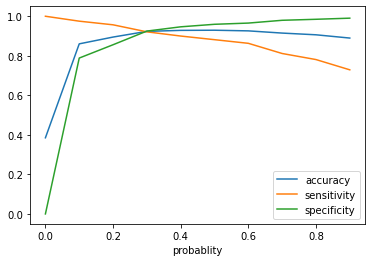

In [933]:
# 
cutoff_df.plot.line(x='probablity', y=['accuracy','sensitivity','specificity'])
plt.show()

We can see the optimal cutoff point is coming around 0.3, lets see values for other metrics with coutoff point as 0.3. 

In [953]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[0.3] )
print(confusion_matrix)

tp = confusion_matrix[1,1] 
tn = confusion_matrix[0,0] 
fp = confusion_matrix[0,1] 
fn = confusion_matrix[1,0]

acc = metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final[0.3])
print("Accuracy of the model is ",round(acc*100,2),'%')

# Sensitivity
Sensitivity = round(tp / float(tp+fn)*100,2)
Specificity = round(tn / float(tn+fp)*100,2)

print('Sensitivity is ',Sensitivity,'%')
print('Specificity is ',Specificity,'%')

# Calculate FPR(False Postive Rate)
fpr = fp/ float(tn  +fp)

# PPV(positive predictive value)
ppv = tp / float(tp + fp)

#NPV(Negative Predictive Value)
npv = tn / float(tn + fn)

print("False Positive Rate is ",round(fpr*100,2),'%')
print("Positive Predictive Value is ",round(ppv*100,2),'%')
print("Negative Predictive Value is ",round(npv*100,2),'%')

ps = precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)
print("Precision Score is ",round(ps*100,2),"%")

rs = recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)
print("Recall Score is ",round(rs*100,2),"%")

[[3612  293]
 [ 193 2253]]
Accuracy of the model is  92.35 %
Sensitivity is  92.11 %
Specificity is  92.5 %
False Positive Rate is  7.5 %
Positive Predictive Value is  88.49 %
Negative Predictive Value is  94.93 %
Precision Score is  93.13 %
Recall Score is  88.14 %


Sensitivity value has improved, while FPR has increased to 7%. 
As suggested by graph we will go ahead and use 0.3 as cutoff point.

#### Applying Model on Test Dataset


In [898]:
# scale numeric variables for test dataset
scaler = StandardScaler()
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Origin_Landing Page Submission,Origin_Lead Add Form,Origin_Lead Import,Source_Google,Source_Olark Chat,...,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
3271,0,0.206475,-0.591008,0.716169,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1490,0,0.511373,1.894051,1.151248,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
7936,0,-0.403321,-0.743117,-0.153989,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4216,0,-1.013117,-0.878732,-1.024147,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3830,0,1.426068,-0.578179,2.456484,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [912]:
X_test = X_test[['Do Not Email', 'Total Time Spent on Website',
       'Origin_Landing Page Submission', 'Origin_Lead Add Form',
       'Source_Olark Chat', 'Source_Welingak Website',
       'last_activity_Olark Chat Conversation', 'last_activity_SMS Sent',
       'Specialization_Travel and Tourism', 'Tag_Closed by Horizzon',
       'Tag_Interested in other courses', 'Tag_Lost to EINS', 'Tag_Others',
       'Tag_Ringing', 'Tag_Will revert after reading the email',
       'Profile_Not Specified', 'Profile_Student of SomeSchool',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Others']]

X_test_sm = sm.add_constant(X_test)

#apply model on test data

y_test_pred = res.predict(X_test_sm)

In [913]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_prob':y_test_pred})
y_test_pred_final.head()

,Converted,Converted_prob
0,0,0.139555
1,1,0.997103
2,0,0.119687
3,1,0.995655
4,0,0.062537


In [948]:
y_test_pred_final['Predicted'] = y_test_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

#### Let's calculate the metric values for test data

In [949]:
# confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
#print(confusion_matrix)

acc = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print("Accuracy of the model is ",round(acc*100,2),'%')

tp = confusion_matrix[1,1] 
tn = confusion_matrix[0,0] 
fp = confusion_matrix[0,1] 
fn = confusion_matrix[1,0]

# Sensitivity
Sensitivity = round(tp / float(tp+fn)*100,2)
Specificity = round(tn / float(tn+fp)*100,2)

print('Sensitivity is ',Sensitivity,'%')
print('Specificity is ',Specificity,'%')

# Calculate FPR(False Postive Rate)
fpr = fp/ float(tn  +fp)

# PPV(positive predictive value)
ppv = tp / float(tp + fp)

#NPV(Negative Predictive Value)
npv = tn / float(tn + fn)

print("False Positive Rate is ",round(fpr*100,2),'%')
print("Positive Predictive Value is ",round(ppv*100,2),'%')
print("Negative Predictive Value is ",round(npv*100,2),'%')

ps = precision_score(y_test_pred_final.Converted , y_test_pred_final.Predicted)
print("Precision Score is ",round(ps*100,2),"%")

rs = recall_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
print("Recall Score is ",round(rs*100,2),"%")

Accuracy of the model is  90.86 %
Sensitivity is  90.09 %
Specificity is  91.29 %
False Positive Rate is  8.71 %
Positive Predictive Value is  85.51 %
Negative Predictive Value is  94.17 %
Precision Score is  85.51 %
Recall Score is  90.09 %


## Comparison between Train and Test data
---------------------------------------------------------------------------------------------

### Train Dataset

- Accuracy - 92.93%
- Sensitivity - 88.14 %
- Specificity - 95.93

### Test Dataset

- Accuracy - 90.86%
- Sensitivity - 90.09%
- Specificity - 91.29%


For the above observations the metric values are very close for Train and Test data so we can accept this model.
